This runs and displays benchmark performance for various tools

In [32]:
%cd twitteranalysis
%run -i environment.py

import pandas as pd
#Plotting 
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Timing etc tools (e.g., @timefn)
from OptimizationTools import *


(bookmark:twitteranalysis) -> /Users/adam/Dropbox/PainNarrativesLab/TwitterDataAnalysis
/Users/adam/Dropbox/PainNarrativesLab/TwitterDataAnalysis


In [33]:
import datetime

# DB query log

In [34]:

BASE = os.getenv("HOME")
# todo restore environment
# from TwitterDataAnalysis.environment import *

# Logging
LOG_FOLDER_PATH = "%s/Desktop/TwitterDataAnalysisLogs" % BASE

query_log = '%s/query_log.csv' % LOG_FOLDER_PATH
query_time_log = '%s/query_time_log.csv' % LOG_FOLDER_PATH

def r(x):
    if x[0] == '0':
        x = '2%s' % x 
    return pd.to_datetime(x)

queries = pd.read_csv(query_log,  header=None, names=['runtime'])
timestamps = pd.read_csv(query_time_log,  header=None, names=['runTimestamp'])


timestamps = timestamps.apply(lambda x: r(x.runTimestamp), axis=1)
# queries = queries.apply(lambda x: float(x))
queries.dropna(inplace=True)


In [35]:


queries.dropna(inplace=True)
# timestamps.runTimestamp = queries.apply(lambda x: r(x.runTimestamp), axis=1)

# queries.runtime = queries.apply(lambda x: float(x.runtime), axis=1)

print("%s long before cutting" % len(queries))
# queries.set_index('runTimestamp', inplace=True)
# queries = queries['2018']
print("%s long after" % len(queries))

67905 long before cutting
67905 long after


In [36]:
totalSeconds = queries.runtime.sum()
meanRuntime = queries.runtime.mean()

# totalSeconds = queries.sum()
# meanRuntime = queries.mean()
totalRecords = len(queries)
print("%s records in %s seconds (%s minutes). " %(totalRecords, totalSeconds, totalSeconds/60))
print("Avg: %s " % (meanRuntime))

67905 records in 37.8193306923 seconds (0.630322178205 minutes). 
Avg: 0.000556944712352 


In [37]:
# numberUsersProcessed = 100
numberUsersProcessed = 4352

totalUsers = 1328927

avgQueriesPerUser = totalRecords / numberUsersProcessed
print("Average queries per user %s" % avgQueriesPerUser)

expectedQueries = totalUsers * avgQueriesPerUser
expRun = expectedQueries * meanRuntime 
print("Expected runtime: %s hours" % (expRun / 60))

Average queries per user 15.603170955882353
Expected runtime: 192.47522089 hours


In [38]:
queries.describe()

,runtime
count,67905.000000
mean,0.000557
std,0.014214
min,0.000073
25%,0.000112
50%,0.000140
75%,0.000168
max,2.000000


/Users/adam/.pyenv/versions/3.4.3/lib/python3.4/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)
/Users/adam/.pyenv/versions/3.4.3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


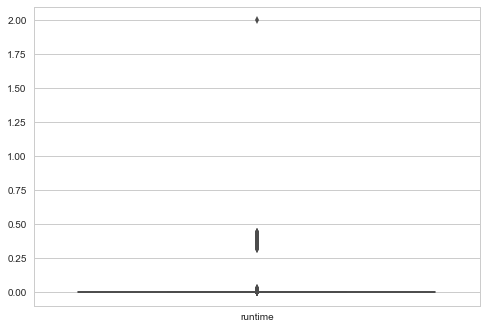

In [39]:
sns.boxplot(queries)

In [40]:
queries.runtime.mean()

0.00055694471235242268

In [41]:
totalEstTime = queries.index.max() - queries.index.min()
totalUsers * (totalEstTime / numberUsersProcessed)

20735169.80882353

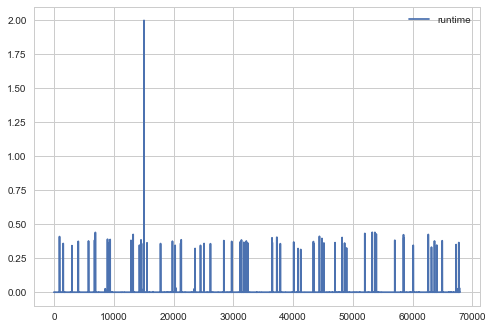

In [42]:
queries.plot()

In [ ]:
d = queries[:50]
d = d.reset_index()

In [ ]:
d.runTimestamp[0]

# Benchmark tweet text processing tools

In [ ]:
%cd twitteranalysis

%run -i profiling/optimizing_string_processor.py

# Display results of benchmark runs

## String processing worker with different datastructures

In [ ]:


NUMTWEETS = 1181

def a(row):
    #correct experiment which iterated over the string
    if len(row.dataStructure) == 1:
        row.dataStructure = 'tuple'
        
    if row.tweetTime > 1 or row.numTweets > NUMTWEETS:
        row.tweetTime = row.totalTime / NUMTWEETS
    return row



#load from file
data = pd.read_csv("%s/tests/benchmarks/StringProcessingWorker.csv" % TEXT_TOOLS_PATH)
data.set_index(['id'], inplace=True)
#fix incorrectly calculated tweet times
data = data.apply(lambda x: a(x), axis=1)
#get rid of outliers from pycharm indexing
data = data[data.totalTime < 80]
data.drop(['module', 'note', 'timestamp'], axis=1, inplace=True)
len(data)

In [ ]:
fig, ax = plt.subplots(2)
# sns.boxplot(data=data[['totalTime', 'tweetTime']], orient='h', ax=ax[0])
sns.boxplot(data=data.totalTime, orient='h', ax=ax[0])
sns.boxplot(data=data.tweetTime, orient='h', ax=ax[1])
fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(2, figsize=(12,6))
sns.boxplot(x="numThreads", y="totalTime", hue="dataStructure", data=data, ax=ax[0])
sns.boxplot(x="numThreads", y="tweetTime", hue="dataStructure", data=data, ax=ax[1])

In [ ]:

import matplotlib.ticker as ticker
# sns.set_style( {'xtick.major.size': 5.0})
g = sns.violinplot(x="numThreads", y="tweetTime", hue="dataStructure", data=data)
# g.set_xticklabels([i for i in range(0, 50, 5)])
# g.set(xticklabels=[i for i in range(0, 50, 5)])
# g.xaxis.set_major_locator(ticker.MultipleLocator(5))
# f = plt.gcf().get_axes()[0]
# f.set_xticks(5)

In [ ]:
fig, ax = plt.subplots(2)
sns.distplot(data.totalTime, kde=True, rug=True, ax=ax[0])
sns.distplot(data.tweetTime, kde=True, rug=True, ax=ax[1])
fig.tight_layout()

In [ ]:
import sys
sys.byteorder

In [ ]:
sns.factorplot(x="numThreads", y="totalTime", hue="dataStructure", data=data) #, kind="swarm") #, ax=axes[0])
fig = plt.gcf()
fig.set_size_inches(12,4)
fig.tight_layout()
# fig.get_axes()[0].set_ylim(0.025,0.04)

In [ ]:
sns.factorplot(x="numThreads", y="tweetTime", hue="dataStructure", data=data) #,ax=axes[1]);
fig = plt.gcf()
fig.set_size_inches(12,4)
fig.get_axes()[0].set_ylim(0.028,0.032)
fig.tight_layout()